In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("ws5.ipynb")

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
#below line allows matplotlib plots to appear in cell output
%matplotlib inline

## **Question 1**: Data Input/Output

In this question, you'll work with data from a physics simulation of projectile motion with air resistance. The data is stored in a CSV file and you'll learn to convert it to NumPy's compressed format.

### Part a: Reading CSV and Saving as NPZ

[np.savez documentation](https://numpy.org/doc/2.3/reference/generated/numpy.savez.html)

Write a function `convert_csv_to_npz(csv_filename, npz_filename)` that:
1. Reads data from a CSV file using `np.genfromtxt()` or `np.loadtxt()`
2. Extracts the columns into separate numpy arrays
3. Saves the arrays to a compressed `.npz` file using `np.savez()`

The CSV file `projectile_simulation.csv` contains simulation data for projectile motion with air resistance. It has 3 header lines (starting with '#') followed by a column header line, then the data rows with 6 columns:
- `time_s`: Time in seconds
- `x_position_m`: Horizontal position in meters
- `y_position_m`: Vertical position in meters
- `x_velocity_m/s`: Horizontal velocity in m/s
- `y_velocity_m/s`: Vertical velocity in m/s
- `kinetic_energy_J`: Kinetic energy in Joules

**Requirements:**
- Skip the first 4 lines (3 comment lines + 1 column header line)
- Use `delimiter=','` when loading the CSV
- Save to the NPZ file with these exact array names:
  - `'time'` for time data
  - `'x_pos'` for x position
  - `'y_pos'` for y position
  - `'x_vel'` for x velocity
  - `'y_vel'` for y velocity
  - `'ke'` for kinetic energy

**Parameters:**
- `csv_filename`: string, path to the CSV file to read
- `npz_filename`: string, path to the NPZ file to create

**Returns:**
- None (but creates the .npz file) (no return statement needed)

In [2]:
def convert_csv_to_npz(csv_filename, npz_filename):
    # BEGIN SOLUTION NO PROMPT
    # Load the CSV file, skipping the first 4 lines (3 comments + 1 column header)
    data = np.loadtxt(csv_filename, delimiter=',', skiprows=4)
    
    # Extract each column
    time = data[:, 0]
    x_pos = data[:, 1]
    y_pos = data[:, 2]
    x_vel = data[:, 3]
    y_vel = data[:, 4]
    ke = data[:, 5]
    
    # Save to NPZ file with specified array names
    np.savez(npz_filename, time=time, x_pos=x_pos, y_pos=y_pos, 
             x_vel=x_vel, y_vel=y_vel, ke=ke)
    # END SOLUTION
    """ # BEGIN PROMPT
    # Write your code here!
    pass
    """; # END PROMPT

In [ ]:
grader.check("q1a")

### Part b: Loading NPZ and Computing Physics Quantities

Write a function `analyze_projectile_data(npz_filename)` that:
1. Loads the NPZ file created in Part a
2. Performs calculations on the projectile motion data
3. Returns key physics quantities

The function should calculate and return:
- **Maximum height**: The maximum value of y_position (in meters)
- **Range**: The maximum value of x_position (in meters)
- **Flight time**: The total time from launch to when the projectile returns to ground level (y_position ≈ 0)
- **Energy loss**: The difference between initial and final kinetic energy (in Joules)

**Requirements:**
- Load the NPZ file using `np.load()`
- Access arrays using the keys: `'time'`, `'x_pos'`, `'y_pos'`, `'ke'`
- For flight time: find the last time where y_position is still positive (> 0.01 m to account for numerical precision)
- Calculate energy_loss = initial_ke - final_ke

**Parameters:**
- `npz_filename`: string, path to the NPZ file to load

**Returns:**
- Tuple `(max_height, range_distance, flight_time, energy_loss)` where:
  - `max_height`: float, maximum vertical position in meters
  - `range_distance`: float, maximum horizontal position in meters
  - `flight_time`: float, time of flight in seconds
  - `energy_loss`: float, kinetic energy lost due to air resistance in Joules

Note: Make sure you call your .npz file `projectile_data.npz` so that test cases work.

In [5]:
def analyze_projectile_data(npz_filename):
    # BEGIN SOLUTION NO PROMPT
    # Load the NPZ file
    data = np.load(npz_filename)
    
    # Extract arrays
    time = data['time']
    x_pos = data['x_pos']
    y_pos = data['y_pos']
    ke = data['ke']
    
    # Calculate maximum height
    max_height = np.max(y_pos)
    
    # Calculate range (maximum horizontal distance)
    range_distance = np.max(x_pos)
    
    # Calculate flight time - find last time where y_position > 0.01
    airborne_indices = np.where(y_pos > 0.01)[0]
    if len(airborne_indices) > 0:
        flight_time = time[airborne_indices[-1]]
    else:
        flight_time = 0.0
    
    # Calculate energy loss
    initial_ke = ke[0]
    final_ke = ke[-1]
    energy_loss = initial_ke - final_ke
    
    return (max_height, range_distance, flight_time, energy_loss)
    # END SOLUTION
    """ # BEGIN PROMPT
    # Load the NPZ file
    data = np.load(npz_filename)

    # Write your code here!
    
    return (max_height, range_distance, flight_time, energy_loss)
    """; # END PROMPT

In [ ]:
grader.check("q1b")

## **Question 2**: Polynomial and 2D Function Plotting

### Part a: General Polynomial Plotter

Write a function `plot_polynomial(coeff, show_plot=False)` that plots a polynomial of arbitrary degree based on the coefficients provided.

The polynomial is defined as:
$$P(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + \cdots + c_n x^n$$

where `coeff = [c_0, c_1, c_2, ..., c_n]` is an array of coefficients. The degree of the polynomial is determined by the length of the coefficient array.

**Requirements:**
- Use `np.linspace(-3, 3, 200)` to create 200 x-values in the range [-3, 3]
- Calculate the polynomial using vectorized NumPy operations (use powers of x)
- Create a plot with:
  - X-axis label: "x"
  - Y-axis label: "P(x)"
  - Title: "Polynomial of Degree N" (where N is the actual degree)
  - Grid with alpha=0.3
  - Blue line with linewidth=2
- Set xlim to [-3, 3]
- The function should return the matplotlib figure object

**Parameters:**
- `coeff`: numpy array or list of floats, polynomial coefficients [c_0, c_1, c_2, ...]
- `show_plot`: boolean, default False. If True, call `plt.show()` to display the plot

**Returns:**
- `fig`: matplotlib figure object

**Hint:** To evaluate the polynomial, use a loop or `np.polyval()` with reversed coefficients, or calculate each term c_i * x**i and sum them.

In [9]:
def plot_polynomial(coeff, show_plot=False):
    # BEGIN SOLUTION NO PROMPT
    """
    Plot a polynomial with given coefficients.
    
    Parameters:
    -----------
    coeff : array-like
        Polynomial coefficients [c_0, c_1, c_2, ..., c_n]
        where P(x) = c_0 + c_1*x + c_2*x^2 + ... + c_n*x^n
    show_plot : bool, default False
        If True, display the plot with plt.show()
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure object containing the plot
    """
    # Create x values
    x = np.linspace(-3, 3, 200)
    
    # Convert coeff to numpy array if needed
    coeff = np.array(coeff)
    
    # Calculate polynomial values
    # P(x) = c_0 + c_1*x + c_2*x^2 + ... + c_n*x^n
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    
    # Get degree of polynomial
    degree = len(coeff) - 1
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, y, 'b-', linewidth=2)
    
    ax.set_xlabel('x')
    ax.set_ylabel('P(x)')
    ax.set_title(f'Polynomial of Degree {degree}')
    ax.set_xlim(-3, 3)
    ax.grid(True, alpha=0.3)
    
    if show_plot:
        plt.show()
    
    return fig
    # END SOLUTION
    """ # BEGIN PROMPT
   
    #do calculation to make array to plot

    #plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ...
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    """; # END PROMPT

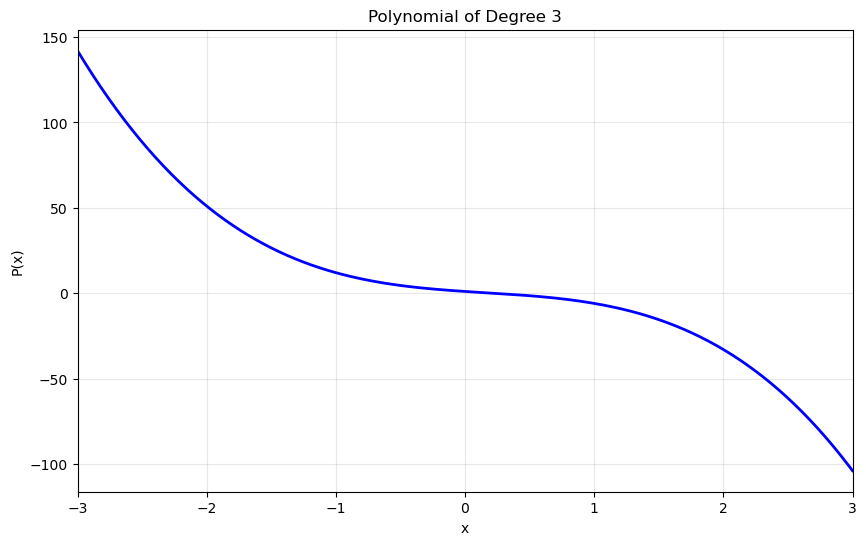

In [10]:
#cell to view plot
coeff = [1,-5,2,-4] #feel free to change this
plot_polynomial(coeff, show_plot=True);

In [ ]:
grader.check("q2a")

### Part b: 2D Function Heatmap

Write a function `plot_2d_function(show_plot=False)` that creates a heatmap visualization of a 2D function.

The function to visualize is:
$$z = f(x, y) = \sin(2x) \cos(3y) + \cos(x) \sin(y)$$

This combination of sine and cosine functions creates an interesting interference pattern.

**Requirements:**
- Create a grid of (x, y) values:
  - x ranges from -π to π with 100 points
  - y ranges from -π to π with 100 points
  - Use `np.meshgrid()` to create the 2D grid
- Calculate z = f(x, y) on the grid
- Create a heatmap using `plt.imshow()` with:
  - Colormap: 'RdBu_r' (red-blue reversed)
  - `origin='lower'` to have y increasing upwards
  - `extent=[-np.pi, np.pi, -np.pi, np.pi]` to set axis limits correctly
  - `aspect='auto'` for proper scaling
- Add a colorbar with label "f(x, y)"
can be done with:  
```
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('f(x, y)')
```
(`im` is the output of `ax.imshow`)
- Set axis labels:
  - X-axis: "x"
  - Y-axis: "y"
- Set title: "Heatmap: sin(2x)cos(3y) + cos(x)sin(y)"
- The function should return the matplotlib figure object

**Parameters:**
- `show_plot`: boolean, default False. If True, call `plt.show()` to display the plot

**Returns:**
- `fig`: matplotlib figure object

**Hint:** After creating the meshgrid X, Y, you can compute the function directly using NumPy: `Z = np.sin(2*X) * np.cos(3*Y) + np.cos(X) * np.sin(Y)`

In [14]:
def plot_2d_function(show_plot=False):
    # BEGIN SOLUTION NO PROMPT
    """
    Create a heatmap of a 2D function: f(x,y) = sin(2x)cos(3y) + cos(x)sin(y)
    
    Parameters:
    -----------
    show_plot : bool, default False
        If True, display the plot with plt.show()
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure object containing the heatmap
    """
    # Create grid
    x = np.linspace(-np.pi, np.pi, 100)
    y = np.linspace(-np.pi, np.pi, 100)
    X, Y = np.meshgrid(x, y)
    
    # Calculate function values
    Z = np.sin(2*X) * np.cos(3*Y) + np.cos(X) * np.sin(Y)
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(Z, cmap='RdBu_r', origin='lower', 
                   extent=[-np.pi, np.pi, -np.pi, np.pi],
                   aspect='auto')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('f(x, y)')
    
    # Set labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Heatmap: sin(2x)cos(3y) + cos(x)sin(y)')
    
    if show_plot:
        plt.show()
    
    return fig
    # END SOLUTION
    """ # BEGIN PROMPT
   
    #do calculation to make array to plot

    #plotting
    fig, ax = plt.subplots(figsize=(10, 8))
    ...
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    """; # END PROMPT


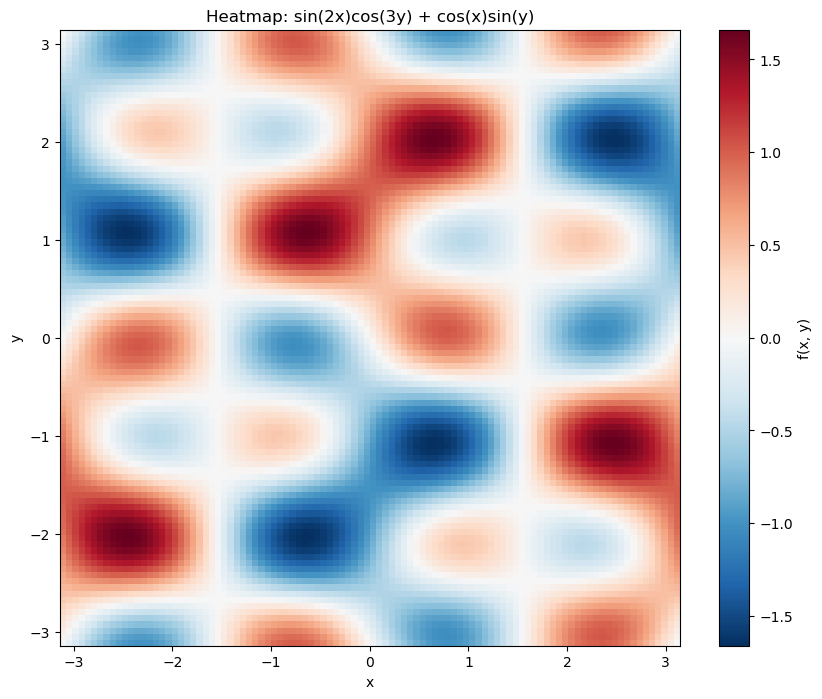

In [15]:
plot_2d_function(show_plot=True);

In [ ]:
grader.check("q2b")

## **Question 3**: Scatter Plot with Distance-Based Colormap

In this question, you'll visualize 2D position data using a scatter plot where the color of each point depends on its distance from the origin.

Write a function `plot_position_scatter(filename, show_plot=False)` that creates a scatter plot of 2D position data with colors representing the distance from the origin.

The data file contains two columns:
- Column 1: x-position
- Column 2: y-position

Each point should be colored according to its distance from the origin: $r = \sqrt{x^2 + y^2}$

**Requirements:**
- Load the data using `np.loadtxt()` with `skiprows=3` (to skip the header lines)
- Extract x and y positions from the columns
- Calculate the distance from origin for each point: $r = \sqrt{x^2 + y^2}$
- Create a scatter plot using `ax.scatter()` with:
  - `c=distances` to color by distance
  - `cmap='viridis'` for the colormap
  - `s=30` for marker size
  - `alpha=0.6` for transparency
- Add a colorbar with label "Distance from Origin"
- Set axis labels:
  - X-axis: "x position"
  - Y-axis: "y position"
- Set title: "2D Position Data Colored by Distance"
- Set equal aspect ratio using `ax.set_aspect('equal')`
- Add a grid with `alpha=0.3`
- The function should return the matplotlib figure object

**Parameters:**
- `filename`: string, path to the data file to read
- `show_plot`: boolean, default False. If True, call `plt.show()` to display the plot

**Returns:**
- `fig`: matplotlib figure object


In [18]:
def plot_position_scatter(filename, show_plot=False):
    # BEGIN SOLUTION NO PROMPT
    """
    Create a scatter plot of 2D position data colored by distance from origin.
    
    Parameters:
    -----------
    filename : str
        Path to the data file containing x and y positions
    show_plot : bool, default False
        If True, display the plot with plt.show()
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure object containing the scatter plot
    """
    # Load the data
    data = np.loadtxt(filename, skiprows=3)
    
    # Extract x and y positions
    x_positions = data[:, 0]
    y_positions = data[:, 1]
    
    # Calculate distance from origin for each point
    distances = np.sqrt(x_positions**2 + y_positions**2)
    
    # Create scatter plot
    fig, ax = plt.subplots(figsize=(10, 10))
    scatter = ax.scatter(x_positions, y_positions, c=distances, 
                        cmap='viridis', s=30, alpha=0.6)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Distance from Origin')
    
    # Set labels and title
    ax.set_xlabel('x position')
    ax.set_ylabel('y position')
    ax.set_title('2D Position Data Colored by Distance')
    
    # Set equal aspect ratio and grid
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    
    if show_plot:
        plt.show()
    
    return fig
    # END SOLUTION
    """ # BEGIN PROMPT
   
    # Load data and calculate distances
    
    # Create scatter plot
    fig, ax = plt.subplots(figsize=(10, 10))
    ...
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    """; # END PROMPT


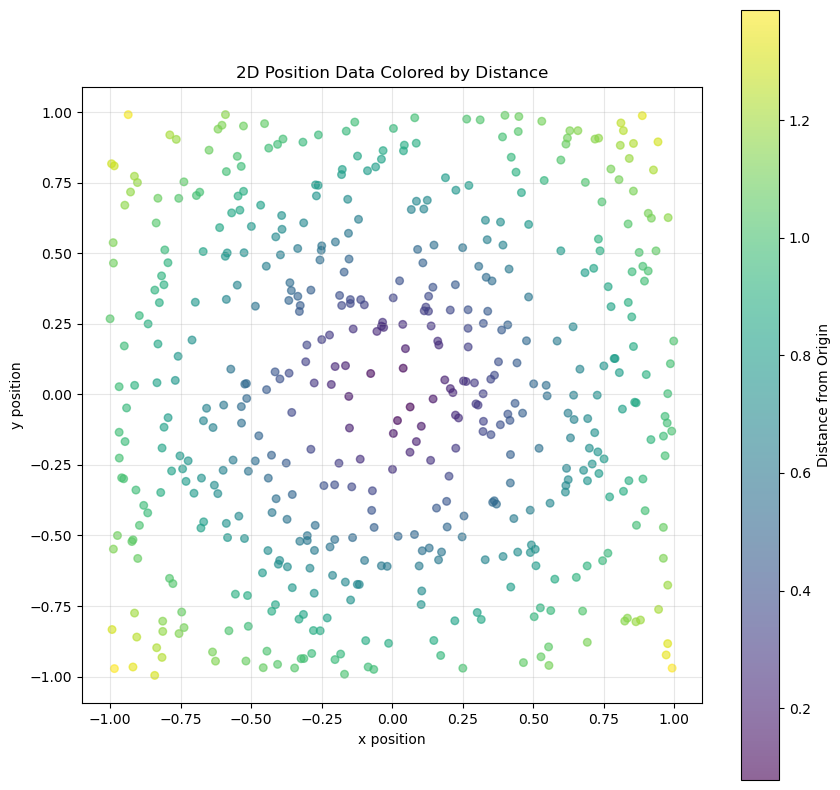

In [19]:
# Cell to view plot
plot_position_scatter('position_data.txt', show_plot=True);

In [ ]:
grader.check("q3")

## Required disclosure of use of AI technology

Please indicate whether you used AI to complete this homework. If you did, explain how you used it in the python cell below, as a comment.

In [24]:
# BEGIN SOLUTION NO PROMPT
# END SOLUTION
""" # BEGIN PROMPT
"""
# write ai disclosure here:

"""
"""; # END PROMPT

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit.

Upload the .zip file to Gradescope!

In [ ]:
grader.export(pdf=False, force_save=True, run_tests=True)